In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf


import seaborn as sns
import warnings
import os
from scipy.interpolate import griddata



from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import datasets, layers, models
from tensorflow import keras


from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error

import meshio
import re

In [15]:
path_to_main= 'airfoil2d/'
folders=os.listdir(path_to_main)

folders

['airFoil_30', 'airFoil_300', 'airFoil_3000']

In [152]:
path_to_folder = 'airFoil_300/VTK/'
folders = os.listdir(path_to_main + path_to_folder)
print(folders)
folder = []
files = []
for i in folders:
    #print(path_to_main +path_to_folder+i)
    if os.path.isdir(path_to_main +path_to_folder+i) == True: 
        folder.append(path_to_main +path_to_folder+i+'/')
        files.append(path_to_main +path_to_folder+i+'/'+'internal.vtu')
#print(files)

['airFoil300_df.npy', 'airFoil300_label.npy', 'airFoil300_p.npy', 'airFoil300_U.npy', 'airFoil_300.vtm.series', 'airFoil_300_0', 'airFoil_300_0.vtm', 'airFoil_300_1', 'airFoil_300_1.vtm', 'airFoil_300_10', 'airFoil_300_10.vtm', 'airFoil_300_100', 'airFoil_300_100.vtm', 'airFoil_300_101', 'airFoil_300_101.vtm', 'airFoil_300_102', 'airFoil_300_102.vtm', 'airFoil_300_103', 'airFoil_300_103.vtm', 'airFoil_300_104', 'airFoil_300_104.vtm', 'airFoil_300_105', 'airFoil_300_105.vtm', 'airFoil_300_106', 'airFoil_300_106.vtm', 'airFoil_300_107', 'airFoil_300_107.vtm', 'airFoil_300_108', 'airFoil_300_108.vtm', 'airFoil_300_109', 'airFoil_300_109.vtm', 'airFoil_300_11', 'airFoil_300_11.vtm', 'airFoil_300_110', 'airFoil_300_110.vtm', 'airFoil_300_111', 'airFoil_300_111.vtm', 'airFoil_300_112', 'airFoil_300_112.vtm', 'airFoil_300_113', 'airFoil_300_113.vtm', 'airFoil_300_114', 'airFoil_300_114.vtm', 'airFoil_300_115', 'airFoil_300_115.vtm', 'airFoil_300_116', 'airFoil_300_116.vtm', 'airFoil_300_117',

In [153]:
x = np.arange(-50,50, 100/256)
y = np.arange(-20,20, 40/66)

In [154]:
U_list = []
p_list = []

for i in files:
    mesh=meshio.read(i)
    print(i)
    points = mesh.points
    p_t=mesh.point_data['p']
    U_t=mesh.point_data['U']
    boolArr= points[:,2] == 0.05
    #print(boolArr)
    points_new=points[boolArr]
    points_new=points_new[:,[0,1]]
    p_new=p_t[boolArr]
    U_new=U_t[boolArr]
    print(points_new.shape)
    grid_x, grid_y= np.meshgrid(x,y)
    p_grid_new = griddata(points_new, p_new, (grid_x, grid_y), method='nearest')
    U_grid_new = griddata(points_new, U_new, (grid_x, grid_y), method='nearest')
    p_list.append(p_grid_new)
    U_list.append(U_grid_new)

airfoil2d/airFoil_300/VTK/airFoil_300_0/internal.vtu
(10906, 2)
airfoil2d/airFoil_300/VTK/airFoil_300_1/internal.vtu
(10906, 2)
airfoil2d/airFoil_300/VTK/airFoil_300_10/internal.vtu
(10906, 2)
airfoil2d/airFoil_300/VTK/airFoil_300_100/internal.vtu
(10906, 2)
airfoil2d/airFoil_300/VTK/airFoil_300_101/internal.vtu
(10906, 2)
airfoil2d/airFoil_300/VTK/airFoil_300_102/internal.vtu
(10906, 2)
airfoil2d/airFoil_300/VTK/airFoil_300_103/internal.vtu
(10906, 2)
airfoil2d/airFoil_300/VTK/airFoil_300_104/internal.vtu
(10906, 2)
airfoil2d/airFoil_300/VTK/airFoil_300_105/internal.vtu
(10906, 2)
airfoil2d/airFoil_300/VTK/airFoil_300_106/internal.vtu
(10906, 2)
airfoil2d/airFoil_300/VTK/airFoil_300_107/internal.vtu
(10906, 2)
airfoil2d/airFoil_300/VTK/airFoil_300_108/internal.vtu
(10906, 2)
airfoil2d/airFoil_300/VTK/airFoil_300_109/internal.vtu
(10906, 2)
airfoil2d/airFoil_300/VTK/airFoil_300_11/internal.vtu
(10906, 2)
airfoil2d/airFoil_300/VTK/airFoil_300_110/internal.vtu
(10906, 2)
airfoil2d/airFoi

airfoil2d/airFoil_300/VTK/airFoil_300_212/internal.vtu
(10906, 2)
airfoil2d/airFoil_300/VTK/airFoil_300_213/internal.vtu
(10906, 2)
airfoil2d/airFoil_300/VTK/airFoil_300_214/internal.vtu
(10906, 2)
airfoil2d/airFoil_300/VTK/airFoil_300_215/internal.vtu
(10906, 2)
airfoil2d/airFoil_300/VTK/airFoil_300_216/internal.vtu
(10906, 2)
airfoil2d/airFoil_300/VTK/airFoil_300_217/internal.vtu
(10906, 2)
airfoil2d/airFoil_300/VTK/airFoil_300_218/internal.vtu
(10906, 2)
airfoil2d/airFoil_300/VTK/airFoil_300_219/internal.vtu
(10906, 2)
airfoil2d/airFoil_300/VTK/airFoil_300_22/internal.vtu
(10906, 2)
airfoil2d/airFoil_300/VTK/airFoil_300_220/internal.vtu
(10906, 2)
airfoil2d/airFoil_300/VTK/airFoil_300_221/internal.vtu
(10906, 2)
airfoil2d/airFoil_300/VTK/airFoil_300_222/internal.vtu
(10906, 2)
airfoil2d/airFoil_300/VTK/airFoil_300_223/internal.vtu
(10906, 2)
airfoil2d/airFoil_300/VTK/airFoil_300_224/internal.vtu
(10906, 2)
airfoil2d/airFoil_300/VTK/airFoil_300_225/internal.vtu
(10906, 2)
airfoil2d/a

In [159]:
print(p_list.length)
p=np.array(p_list)
U=np.array(U_list)
U_mean=np.mean(U, axis=3)
print(U_mean.shape)

fig = plt.figure(figsize=(8, 14))

fig.add_subplot(4, 1, 1)
plt.imshow(p[234,:,:])
plt.title('p')
plt.axis('off')

fig.add_subplot(4, 1, 2)
plt.imshow(U_mean[234,:,:])
plt.title('U_mean')
plt.axis('off')

fig.add_subplot(4, 1, 3)
plt.imshow(U[234,:,:,0])
plt.title('U_x')
plt.axis('off')

fig.add_subplot(4, 1, 4)
plt.imshow(U[234,:,:,1])
plt.title('U_y')
plt.axis('off')

plt.show()

AttributeError: 'list' object has no attribute 'length'

In [160]:
p=p.reshape(235,66,256,1)
df=np.concatenate((U, p), axis=3)

[a,b,c,d]=df.shape

#finding index of last simulation timestep
idx = [i for i, item in enumerate(files) if re.search(str(a-1), item)]

df_label= []

for i in range(a):
  df_label.append(df[idx,:,:,:])
df_label=np.array(df_label)
df_label=df_label.reshape((a,b,c,d))
print(df_label.shape)

(235, 66, 256, 4)


In [39]:
# saving the arrays for easier processing
np.save(path_to_main +path_to_folder+'airFoil300_df',df)
np.save(path_to_main +path_to_folder+'airFoil300_label',df_label)

In [56]:
# loading existing data sets
# existing datasets 
# airfoil_test: 'airFoil300_U.npy', 'airFoil300_p.npy'
# normalising and combining the arrays, producing
df = np.load(path_to_main +path_to_folder+'airFoil300_df.npy')
df_label = np.load(path_to_main +path_to_folder+'airFoil300_label.npy')

#normalise U Vektors
U_max=np.max(abs(df[:,:,:,[0,1,2]]))
p_max=np.max(abs(df[:,:,:,[3]]))

normal=np.array([U_max,U_max,U_max, p_max]).reshape(1,1,1,4)
print(normal)
df=df/normal
df_label=df_label/normal

[[[[   449.21906    449.21906    449.21906 408081.25   ]]]]


In [57]:
train_data, test_data, label_train, label_test = train_test_split (df, df_label, test_size = 0.15)

In [105]:
# Valid for input with four layers
model = models.Sequential()
model.add(layers.Conv2D(4,(2, 8), (2, 8), activation='tanh', input_shape=(66,256, 4)))
model.add(layers.Conv2D(32,(3, 4), (3, 4), activation='tanh',))
model.add(layers.Conv2D(256,(11, 8), (11, 8), activation='tanh',))
model.add(layers.Conv2DTranspose(32,(11,8),(11,8), activation='tanh'))
model.add(layers.Conv2DTranspose(4,(3,4),(3,4), activation='tanh'))
model.add(layers.Conv2DTranspose(4,(2,8),(2,8), activation='PReLU'))


In [106]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_57 (Conv2D)          (None, 33, 32, 4)         260       
                                                                 
 conv2d_58 (Conv2D)          (None, 11, 8, 32)         1568      
                                                                 
 conv2d_59 (Conv2D)          (None, 1, 1, 256)         721152    
                                                                 
 conv2d_transpose_48 (Conv2D  (None, 11, 8, 32)        720928    
 Transpose)                                                      
                                                                 
 conv2d_transpose_49 (Conv2D  (None, 33, 32, 4)        1540      
 Transpose)                                                      
                                                                 
 conv2d_transpose_50 (Conv2D  (None, 66, 256, 4)     

In [107]:
model.compile(optimizer='adam',
              loss='mse')

In [112]:
history = model.fit(train_data, label_train, epochs=100, 
                    validation_data=(test_data, label_test),
                    batch_size=32,)

Epoch 1/100
7/7 [==============================] - 2s 330ms/step - loss: 0.0219 - val_loss: 0.0200
Epoch 2/100
7/7 [==============================] - 2s 327ms/step - loss: 0.0190 - val_loss: 0.0174
Epoch 3/100
7/7 [==============================] - 2s 324ms/step - loss: 0.0166 - val_loss: 0.0154
Epoch 4/100
7/7 [==============================] - 2s 321ms/step - loss: 0.0147 - val_loss: 0.0137
Epoch 5/100
7/7 [==============================] - 2s 327ms/step - loss: 0.0132 - val_loss: 0.0124
Epoch 6/100
7/7 [==============================] - 2s 325ms/step - loss: 0.0120 - val_loss: 0.0113
Epoch 7/100
7/7 [==============================] - 2s 324ms/step - loss: 0.0109 - val_loss: 0.0104
Epoch 8/100
7/7 [==============================] - 2s 323ms/step - loss: 0.0101 - val_loss: 0.0096
Epoch 9/100
7/7 [==============================] - 2s 326ms/step - loss: 0.0093 - val_loss: 0.0089
Epoch 10/100
7/7 [==============================] - 2s 327ms/step - loss: 0.0087 - val_loss: 0.0083
Epoch 11/

Epoch 80/100
7/7 [==============================] - 2s 324ms/step - loss: 7.2275e-04 - val_loss: 7.2149e-04
Epoch 81/100
7/7 [==============================] - 2s 322ms/step - loss: 7.2076e-04 - val_loss: 7.1952e-04
Epoch 82/100
7/7 [==============================] - 2s 321ms/step - loss: 7.1875e-04 - val_loss: 7.1743e-04
Epoch 83/100
7/7 [==============================] - 2s 328ms/step - loss: 7.1664e-04 - val_loss: 7.1541e-04
Epoch 84/100
7/7 [==============================] - 2s 329ms/step - loss: 7.1478e-04 - val_loss: 7.1382e-04
Epoch 85/100
7/7 [==============================] - 2s 328ms/step - loss: 7.1308e-04 - val_loss: 7.1181e-04
Epoch 86/100
7/7 [==============================] - 2s 328ms/step - loss: 7.1116e-04 - val_loss: 7.0990e-04
Epoch 87/100
7/7 [==============================] - 2s 326ms/step - loss: 7.0912e-04 - val_loss: 7.0777e-04
Epoch 88/100
7/7 [==============================] - 2s 321ms/step - loss: 7.0707e-04 - val_loss: 7.0592e-04
Epoch 89/100
7/7 [==========

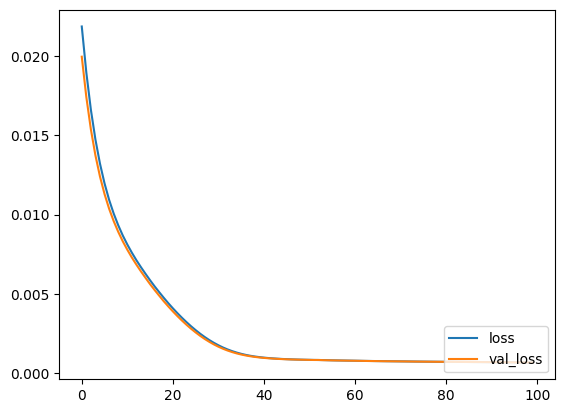

In [113]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
#plt.xlabel('Epoch')
#plt.ylabel('loss')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [114]:
test=model.predict(test_data)

2/2 [==============================] - 0s 7ms/step


In [144]:
print(label_test.shape)
print(np.max(test))
label_test=label_test.reshape((36,66,256,4))
#plt.imshow(np.clip(label_test[1,:,:,3],0,1))

(36, 1, 66, 256, 4)
0.8565986


(36, 66, 256, 4)


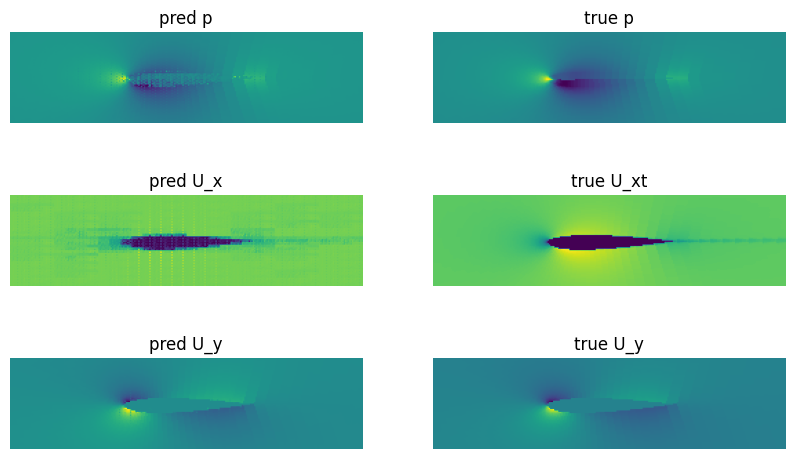

In [150]:
print(test_data.shape)

fig = plt.figure(figsize=(10, 6))

fig.add_subplot(3, 2, 1)
plt.imshow(test[2,:,:,3])
plt.title('pred p')
plt.axis('off')


fig.add_subplot(3, 2,3)
plt.imshow(test[2,:,:,0])
plt.title('pred U_x')
plt.axis('off')

fig.add_subplot(3, 2, 5)
plt.imshow(test[2,:,:,1])
plt.title('pred U_y')
plt.axis('off')

fig.add_subplot(3, 2, 2)
plt.imshow(label_test[1,:,:,3])
plt.title('true p')
plt.axis('off')


fig.add_subplot(3, 2,4)
plt.imshow(label_test[1,:,:,0])
plt.title('true U_xt')
plt.axis('off')

fig.add_subplot(3, 2, 6)
plt.imshow(label_test[1,:,:,1])
plt.title('true U_y')
plt.axis('off')


plt.show()